### importing and Reading data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df1 = pd.read_csv('../Data/api_data_aadhar_enrolment/api_data_aadhar_enrolment_0_500000.csv')
df2 = pd.read_csv('../Data/api_data_aadhar_enrolment/api_data_aadhar_enrolment_500000_1000000.csv')
df3 = pd.read_csv('../Data/api_data_aadhar_enrolment/api_data_aadhar_enrolment_1000000_1006029.csv')

In [3]:
df1.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


In [4]:
df3.tail()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
6024,31-12-2025,West Bengal,West Midnapore,721149,2,0,0
6025,31-12-2025,West Bengal,West Midnapore,721150,2,2,0
6026,31-12-2025,West Bengal,West Midnapore,721305,0,1,0
6027,31-12-2025,West Bengal,West Midnapore,721504,1,0,0
6028,31-12-2025,West Bengal,West Midnapore,721517,2,1,0


#### merging data


In [5]:
df = pd.concat([df1, df2, df3], axis=0, ignore_index=True)


In [6]:
df.shape

(1006029, 7)

In [7]:
df.tail()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
1006024,31-12-2025,West Bengal,West Midnapore,721149,2,0,0
1006025,31-12-2025,West Bengal,West Midnapore,721150,2,2,0
1006026,31-12-2025,West Bengal,West Midnapore,721305,0,1,0
1006027,31-12-2025,West Bengal,West Midnapore,721504,1,0,0
1006028,31-12-2025,West Bengal,West Midnapore,721517,2,1,0


In [8]:
df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


### Basic Overview and transformation

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   date            1006029 non-null  object
 1   state           1006029 non-null  object
 2   district        1006029 non-null  object
 3   pincode         1006029 non-null  int64 
 4   age_0_5         1006029 non-null  int64 
 5   age_5_17        1006029 non-null  int64 
 6   age_18_greater  1006029 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 53.7+ MB


In [10]:
df.isna().sum()

date              0
state             0
district          0
pincode           0
age_0_5           0
age_5_17          0
age_18_greater    0
dtype: int64

This is only a data quality check.

- There are no missing values in any column.

- The dataset is complete and clean with respect to nulls.

In [11]:
df.duplicated().sum()

np.int64(22957)

In [12]:
df[df.duplicated()]

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
360605,13-10-2025,Punjab,Jalandhar,144041,2,1,0
360606,13-10-2025,Punjab,Jalandhar,144101,1,0,0
360607,13-10-2025,Punjab,Jalandhar,144102,2,0,0
360608,13-10-2025,Punjab,Jalandhar,144418,1,0,0
360609,13-10-2025,Punjab,Jalandhar,144419,1,0,0
...,...,...,...,...,...,...,...
1001611,31-12-2025,Telangana,Hyderabad,500045,4,5,1
1001612,31-12-2025,Telangana,Hyderabad,500057,0,2,0
1001613,31-12-2025,Telangana,Hyderabad,500061,4,2,0
1001614,31-12-2025,Telangana,Hyderabad,500062,1,4,0


About 2.3% of dataset is repeated data.we have about 22,957 duplicate rows out of 1,006,029 total records.

The Aadhaar enrollment dataset has relatively good data integrity , indicating a much more stable and controlled data ingestion pipeline compared to the demographic update dataset.

It does NOT mean:

- Citizens are duplicated

- Aadhaar records are wrong

- Data is fake

What it strongly suggests:

- dataset has been appended multiple times with overlapping records.

This tells dataset is not transaction-safe.

If we trained ML models or calculated trends before cleaning:

 - counts are inflated

 - daily totals are wrong

 - growth rates are biased

 - forecasting will be inaccurate

Typical causes:

- Same API response saved twice

- Same CSV batch merged more than once

- Partial time-window overlap between files

- Retry jobs writing the same records again

- No primary-key enforcement during ingestion


So this single line of code revealed:

dataset has integrity leakage.

so we going to remove this duplicate.

In [13]:
df = df.drop_duplicates()


In [14]:
df.shape

(983072, 7)

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df['date'] = pd.to_datetime(df['date'], format="%d-%m-%Y")


In [17]:
print(df['date'].min().date())
print(df['date'].max().date())

2025-03-02
2025-12-31


In [18]:
df = df.sort_values(by='date')


In [19]:
df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37
32,2025-03-09,West Bengal,Dinajpur Uttar,733129,26,18,27
31,2025-03-09,Uttar Pradesh,Lucknow,226003,23,102,17
30,2025-03-09,West Bengal,Coochbehar,736135,19,12,19
29,2025-03-09,Bihar,Purbi Champaran,845304,18,72,12


### Analysis start

In [20]:
df['date'].nunique()

92

In [21]:
days_per_month = df.groupby(df['date'].dt.to_period('M'))['date'].nunique()
print(days_per_month)


date
2025-03     9
2025-04     1
2025-05     1
2025-06     1
2025-07     1
2025-09    30
2025-10    18
2025-11    20
2025-12    11
Freq: M, Name: date, dtype: int64


In [22]:

days_per_month = df.groupby(df['date'].dt.to_period('M'))['date'].apply(
    lambda x: x.dt.day.unique()
)

# uncomment below lines to see full output
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(days_per_month)
days_per_month # comment this if uncommented above

date
2025-03                   [2, 9, 15, 20, 23, 26, 27, 28, 29]
2025-04                                                  [1]
2025-05                                                  [1]
2025-06                                                  [1]
2025-07                                                  [1]
2025-09    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
2025-10    [13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 2...
2025-11    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
2025-12         [15, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31]
Freq: M, Name: date, dtype: object

The Aadhaar enrollment dataset exhibits a three-stage temporal structure: a partial operational phase in March 2025 with intermittent daily records, a snapshot-based reporting phase from April to July with only one reporting day per month, and a fully operational daily reporting phase beginning in September 2025. 

The presence of daily enrollment data earlier than biometric and demographic datasets suggests that enrollment pipelines reached real-time maturity sooner. 

August 2025 is completely absent across all Aadhaar datasets, confirming a system-wide reporting gap. 

December 2025 contains only partial coverage and should be treated as an incomplete month in temporal analyses.

🚨 Analytical limitation
we cannot:

- Do proper daily trend analysis

- Detect weekday/weekend effects

- Assume smooth time series continuity

- we cannot treat the entire dataset as a continuous time series.

🧠 Possible reasons:

Data collected during:

- Special update drives

- Camps

- Bulk correction programs

#### state analysis

In [23]:
print(df['state'].nunique())
df['state'].unique()

55


array(['Meghalaya', 'West Bengal', 'Uttar Pradesh', 'Bihar', 'Delhi',
       'Madhya Pradesh', 'Haryana', 'Punjab', 'Rajasthan', 'Karnataka',
       'Maharashtra', 'Assam', 'Uttarakhand', 'Tamil Nadu', 'Gujarat',
       'Andhra Pradesh', 'Chhattisgarh', 'Jharkhand', 'Nagaland',
       'Chandigarh', 'Sikkim', 'Tripura', 'Jammu and Kashmir', 'Odisha',
       'Telangana', 'Manipur', 'Mizoram', 'Kerala',
       'The Dadra And Nagar Haveli And Daman And Diu',
       'Jammu And Kashmir', 'Himachal Pradesh', 'Arunachal Pradesh',
       'Goa', 'Dadra and Nagar Haveli', 'Andaman and Nicobar Islands',
       'Jammu & Kashmir', 'Andaman & Nicobar Islands', 'Orissa',
       'Pondicherry', 'Puducherry', 'WEST BENGAL', 'West  Bengal',
       'Ladakh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Dadra & Nagar Haveli', 'Daman and Diu', 'Lakshadweep',
       'Daman & Diu', '100000', 'West Bangal', 'Westbengal',
       'West bengal', 'andhra pradesh', 'ODISHA', 'WESTBENGAL'],
      dtype=object)

we have 55 unique “state” values, while India has only ~36 States/UTs.

The extra entries are not real states; they are data contamination.

The enrollment dataset shows inconsistencies in the state column, with 55 unique entries instead of the expected ~36. 

This indicates schema-level data contamination and upstream ETL validation failures. Without correction, all state-level enrollment analyses would be fundamentally flawed.

Why this is dangerous:

- State-wise aggregation will be wrong

- One state will appear as multiple smaller states

- Rankings, heatmaps, comparisons will be misleading

- Policy insights become invalid

##### organizing states

here we use mapping technique , in which we map inconsistance state name with it correct name



In [24]:
# Keep original
df['state_raw'] = df['state'].astype(str)

# 1. Basic formatting
df['state_clean'] = (
    df['state_raw']
    .str.strip()
    .str.title()
    .replace(r'\s+', ' ', regex=True)
)


In [25]:
state_mapping = {
    # Merging Union Territories & Synonyms
    'Daman & Diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'Daman And Diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'Dadra & Nagar Haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'Dadra And Nagar Haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'Dadra And Nagar Haveli And Daman And Diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'The Dadra And Nagar Haveli And Daman And Diu': 'Dadra and Nagar Haveli and Daman and Diu',

    
    # Spelling corrections
    'Westbengal': 'West Bengal',
    'West Bangal': 'West Bengal',
    'West Bengli': 'West Bengal',
    'Orissa': 'Odisha',
    'Chhatisgarh': 'Chhattisgarh',
    'Tamilnadu': 'Tamil Nadu',
    'Uttaranchal': 'Uttarakhand',
    'Pondicherry': 'Puducherry',
    'Andaman & Nicobar Islands': 'Andaman and Nicobar Islands',
    'Andaman And Nicobar Islands': 'Andaman and Nicobar Islands',
    'Jammu & Kashmir': 'Jammu and Kashmir',
    'Jammu And Kashmir': 'Jammu and Kashmir',
    'Balanagar': 'Telangana' ,
    'Darbhanga' : 'Bihar' ,
    'Puttenahalli' : 'Karnataka' ,
    'Jaipur' : 'Rajasthan' ,
    'Madanapalle' : 'Andhra Pradesh' ,
    '100000' : 'Unknown',
    'Nagpur' : 'Maharashtra',
    'Raja Annamalai Puram' : 'Tamil Nadu'
}

df['state_clean'] = df['state_clean'].replace(state_mapping)

In [26]:
print(df['state_clean'].nunique())
df['state_clean'].unique()

37


array(['Meghalaya', 'West Bengal', 'Uttar Pradesh', 'Bihar', 'Delhi',
       'Madhya Pradesh', 'Haryana', 'Punjab', 'Rajasthan', 'Karnataka',
       'Maharashtra', 'Assam', 'Uttarakhand', 'Tamil Nadu', 'Gujarat',
       'Andhra Pradesh', 'Chhattisgarh', 'Jharkhand', 'Nagaland',
       'Chandigarh', 'Sikkim', 'Tripura', 'Jammu and Kashmir', 'Odisha',
       'Telangana', 'Manipur', 'Mizoram', 'Kerala',
       'Dadra and Nagar Haveli and Daman and Diu', 'Himachal Pradesh',
       'Arunachal Pradesh', 'Goa', 'Andaman and Nicobar Islands',
       'Puducherry', 'Ladakh', 'Lakshadweep', 'Unknown'], dtype=object)

In [27]:
count = (df['state_clean'] == 'Unknown').sum()
print(count)

21


21 is negligibal so we can drop it for analytics . but in real that 21 people also matter .

In [28]:
df = df[df['state_clean'] != 'Unknown']
df.shape

(983051, 9)

The enrollment dataset initially contained 55 distinct ‘state’ values due to spelling variations, administrative renamings , and invalid numeric entries. 

A canonical mapping framework was implemented to normalize state identities, merging synonymous UTs, correcting historical and typographical variations names to their correct states. 

This reduced state cardinality to 37 (including a negligible ‘Unknown’ category of only 21 records), restoring administrative consistency and ensuring that all state-level demographic analyses are structurally valid.

#### Organizing districts

In [29]:
print(df['district'].nunique())
df['district'].unique()

984


array(['East Khasi Hills', 'Dinajpur Uttar', 'Lucknow', 'Coochbehar',
       'Purbi Champaran', 'West Delhi', 'Katni', 'Gwalior', 'Bhind',
       'Gurugram', 'Amritsar', 'Bhagalpur', 'Sikar', 'Bengaluru Urban',
       'Madhubani', 'Gautam Buddha Nagar', 'Faridabad', 'Aligarh',
       'Sitamarhi', 'Bahraich', 'Kanpur Nagar', 'Maharajganj',
       'Aurangabad', 'Ghaziabad', 'Firozabad', 'Kokrajhar',
       'North West Delhi', 'Agra', 'West Jaintia Hills', 'Unnao',
       'Saharanpur', 'Marigaon', 'Haridwar', 'Parbhani', 'Nagaon',
       'West Khasi Hills', 'Kanchipuram', 'Patna', 'Tinsukia',
       'Bongaigaon', 'Lakhimpur', 'Patan', 'Ludhiana', 'Banas Kantha',
       'Dhubri', 'Vadodara', 'Dehradun', 'Hojai', 'Spsr Nellore',
       'Nainital', 'Baksa', 'Dibrugarh', 'Udalguri', 'Chirang',
       'Sonitpur', 'Jaunpur', 'Thane', 'Dhemaji', 'Kamrup', 'Barpeta',
       'Dohad', 'Bijapur', 'Mathura', 'Banda', 'Kachchh', 'Muzaffarpur',
       'Deoghar', 'Morbi', 'Raipur', 'Gorakhpur', 'Bulands

“The district column contains substantial naming inconsistencies, including spelling variations, case differences, legacy names, and special characters (e.g., *, ?). This inflates the number of unique districts to 984, exceeding India’s actual district count, and would severely distort any district-wise biometric update analysis unless standardized.”

Here We implemented a two-phase district name standardization pipeline. 

In the first phase, strict deterministic normalization removed all formatting noise by collapsing case, spacing, and punctuation variations into canonical keys. The most frequent original form was selected as the standard label for each key, ensuring data-driven consistency. 

In the second phase, fuzzy string matching was applied to resolve genuine spelling differences and phonetic variations using an 85% similarity threshold, with high-frequency names acting as canonical anchors. This hybrid approach significantly reduced artificial geographic fragmentation while preserving administrative accuracy.

The threshold here refers to the minimum similarity score required for two district names to be considered the same entity during fuzzy matching.

- Only district names that are at least 85% similar are merged.

Why we choose 85 :

- High enough to avoid false merges

- Low enough to catch real spelling variations


In [30]:
import re
import pandas as pd
from thefuzz import process, fuzz

# 1. PREP & HARD-STRIP 

df['district_raw'] = df['district'].astype(str).str.strip()
df = df[df['district_raw'] != ""].copy()

def normalize_strict(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9]', '', text) 
    return text

# Create a 'key' that has no spaces at all
df['match_key'] = df['district_raw'].apply(normalize_strict)


# 2. BUILD THE CANONICAL MAP

# We still want to pick the most frequent human-readable name
freq = df['district_raw'].value_counts().to_dict()
unique_keys = df['match_key'].unique()

# Map every 'match_key' to the most frequent 'district_raw' name
key_to_clean_name = {}
for key in unique_keys:
    # Get all raw names that resolve to this spaceless key
    potential_names = df[df['match_key'] == key]['district_raw'].unique()
    # Pick the one that appears most often in the data
    best_name = max(potential_names, key=lambda x: freq[x])
    key_to_clean_name[key] = best_name

df['district_clean'] = df['match_key'].map(key_to_clean_name)


# 3. SECOND PASS: FUZZY MATCHING 

# Now we handle the spelling differences on the already "de-spaced" names
unique_clean = df['district_clean'].unique()
clean_freq = df['district_clean'].value_counts().to_dict()
sorted_clean = sorted(unique_clean, key=lambda x: clean_freq[x], reverse=True)

fuzzy_map = {}
already_grouped = set()

for name in sorted_clean:
    if name in already_grouped:
        continue
    
    # Lower threshold to 85 to be more aggressive
    matches = process.extract(name, unique_clean, scorer=fuzz.ratio, limit=10)
    
    for match, score in matches:
        if score >= 85: 
            fuzzy_map[match] = name
            already_grouped.add(match)

df['district_clean'] = df['district_clean'].map(fuzzy_map)


In [31]:
print(df['district_clean'].nunique())
df['district_clean'].unique()

826


array(['East Khasi Hills', 'Dinajpur Uttar', 'Lucknow', 'Cooch Behar',
       'Purba Champaran', 'West Delhi', 'Katni', 'Gwalior', 'Bhind',
       'Gurugram', 'Amritsar', 'Bhagalpur', 'Sikar', 'Bengaluru Urban',
       'Madhubani', 'Gautam Buddha Nagar', 'Faridabad', 'Raigarh',
       'Sitamarhi', 'Bahraich', 'Kanpur Nagar', 'Maharajganj',
       'Aurangabad', 'Ghaziabad', 'Firozabad', 'Kokrajhar',
       'North East Delhi', 'Agra', 'West Jaintia Hills', 'Unnao',
       'Saharanpur', 'Marigaon', 'Haridwar', 'Parbhani', 'Nagaon',
       'Kancheepuram', 'Patna', 'Tinsukia', 'Bongaigaon', 'Lakhimpur',
       'Patan', 'Ludhiana', 'Banaskantha', 'Dhubri', 'Vadodara',
       'Dehradun', 'Hojai', 'Spsr Nellore', 'Nainital', 'Baksa',
       'Dibrugarh', 'Udalguri', 'Chirang', 'Sonitpur', 'Jaunpur', 'Thane',
       'Dhemaji', 'Kamrup', 'Barpeta', 'Dohad', 'Bijapur', 'Mathura',
       'Banda', 'Kachchh', 'Muzaffarpur', 'Deoghar', 'Morbi', 'Raipur',
       'Gorakhpur', 'Bulandshahr', 'Pashchim Ch

“District-level biometric update analysis is highly sensitive to administrative name consistency. Our preprocessing pipeline reduced district fragmentation by ~15% using strict normalization and fuzzy clustering. Remaining duplications are primarily due to official renaming and jurisdictional changes, requiring domain-aware canonical mapping. This step significantly enhances spatial accuracy and prevents misleading regional comparisons.”

##### Here we creating total_biometric colume which show total biometric updates , which are useful for further analytics

In [32]:
df['total_enrollments'] = df['age_0_5'] + df['age_5_17'] + df['age_18_greater']


In [33]:
df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,state_raw,state_clean,district_raw,match_key,district_clean,total_enrollments
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37,Meghalaya,Meghalaya,East Khasi Hills,eastkhasihills,East Khasi Hills,109
32,2025-03-09,West Bengal,Dinajpur Uttar,733129,26,18,27,West Bengal,West Bengal,Dinajpur Uttar,dinajpuruttar,Dinajpur Uttar,71
31,2025-03-09,Uttar Pradesh,Lucknow,226003,23,102,17,Uttar Pradesh,Uttar Pradesh,Lucknow,lucknow,Lucknow,142
30,2025-03-09,West Bengal,Coochbehar,736135,19,12,19,West Bengal,West Bengal,Coochbehar,coochbehar,Cooch Behar,50
29,2025-03-09,Bihar,Purbi Champaran,845304,18,72,12,Bihar,Bihar,Purbi Champaran,purbichamparan,Purba Champaran,102


### Numeric Analysis and grouping
Now we are going to do different-different grouping techniques which give us more in depth information about our data


#### total enrollments in country

In [34]:
df[['age_0_5', 'age_5_17', 'age_18_greater', 'total_enrollments']].sum()

age_0_5              3474389
age_5_17             1690908
age_18_greater        166249
total_enrollments    5331546
dtype: int64

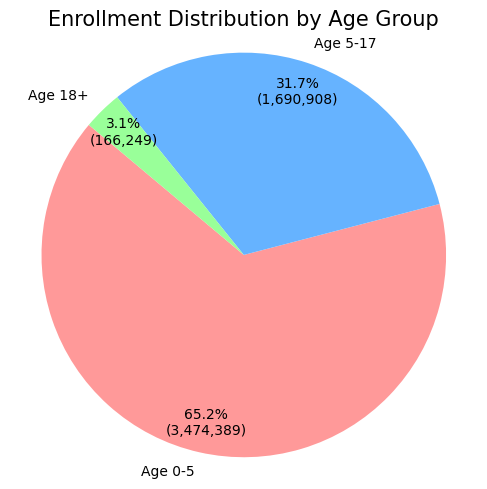

In [35]:
import matplotlib.pyplot as plt

# 1. Define the data
labels = ['Age 0-5', 'Age 5-17', 'Age 18+']
sizes = [3474389, 1690908, 166249]
total = sum(sizes)

# 2. Define a function to format the labels
def func(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    # Returns a string with percentage and the absolute value in brackets
    return f"{pct:.1f}%\n({absolute:,})"

# 3. Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(
    sizes, 
    labels=labels, 
    autopct=lambda pct: func(pct, sizes), # Use the custom function here
    startangle=140, 
    colors=['#ff9999','#66b3ff','#99ff99'],
    pctdistance=0.85 # Moves the text slightly outward for better readability
)


plt.title('Enrollment Distribution by Age Group', fontsize=15)
plt.axis('equal') 
plt.tight_layout()
plt.show()

Enrollment activity is overwhelmingly driven by the 0–5 age group (65%), while demographic and biometric updates are dominated by adults (90% and ~50% respectively), confirming a lifecycle pattern where Aadhaar is issued in childhood and maintained in adulthood.

Enrollment is child-driven : More than 2 out of every 3 new Aadhaar records are for children aged 0–5 . This confirms Aadhaar’s penetration at birth/early childhood.

Age 18+ enrollment is almost saturated
Only 3.1% enrollments are adults →
Most adults already have Aadhaar, they only do updates.

Age 5–17 is a transition group
31.7% enrollment shows:
- School admissions
- Re-registrations
- First-time Aadhaar after early childhood

Aadhaar usage lifecycle
- Birth / Early childhood → Enrollment
- School age → Corrections & first-time late enrollments
- Adulthood → Mostly demographic & biometric updates

#### total enrollments in different state

In [36]:

statewise_sum = df.groupby('state_clean')[['age_0_5', 'age_5_17', 'age_18_greater', 'total_enrollments']].sum()

In [ ]:
# this is only to save data and use it further for multivarite analysis
# This moves 'state_clean' from the index to a normal column
final_df = statewise_sum.reset_index()
final_df.to_csv('../Data/Grouped_data/statewise_data_enrollments.csv', index=False)

In [37]:
statewise_sum = statewise_sum.sort_values(by='total_enrollments', ascending=False)
statewise_sum

,age_0_5,age_5_17,age_18_greater,total_enrollments
state_clean,,,,
Uttar Pradesh,511727,473205,17699,1002631
Bihar,254911,327043,11799,593753
Madhya Pradesh,363244,115172,9476,487892
West Bengal,270419,90335,8495,369249
Maharashtra,274274,81069,8103,363446
Rajasthan,224977,110131,5483,340591
Gujarat,188709,70270,16063,275042
Assam,137970,64834,22555,225359
Karnataka,176178,33402,10038,219618


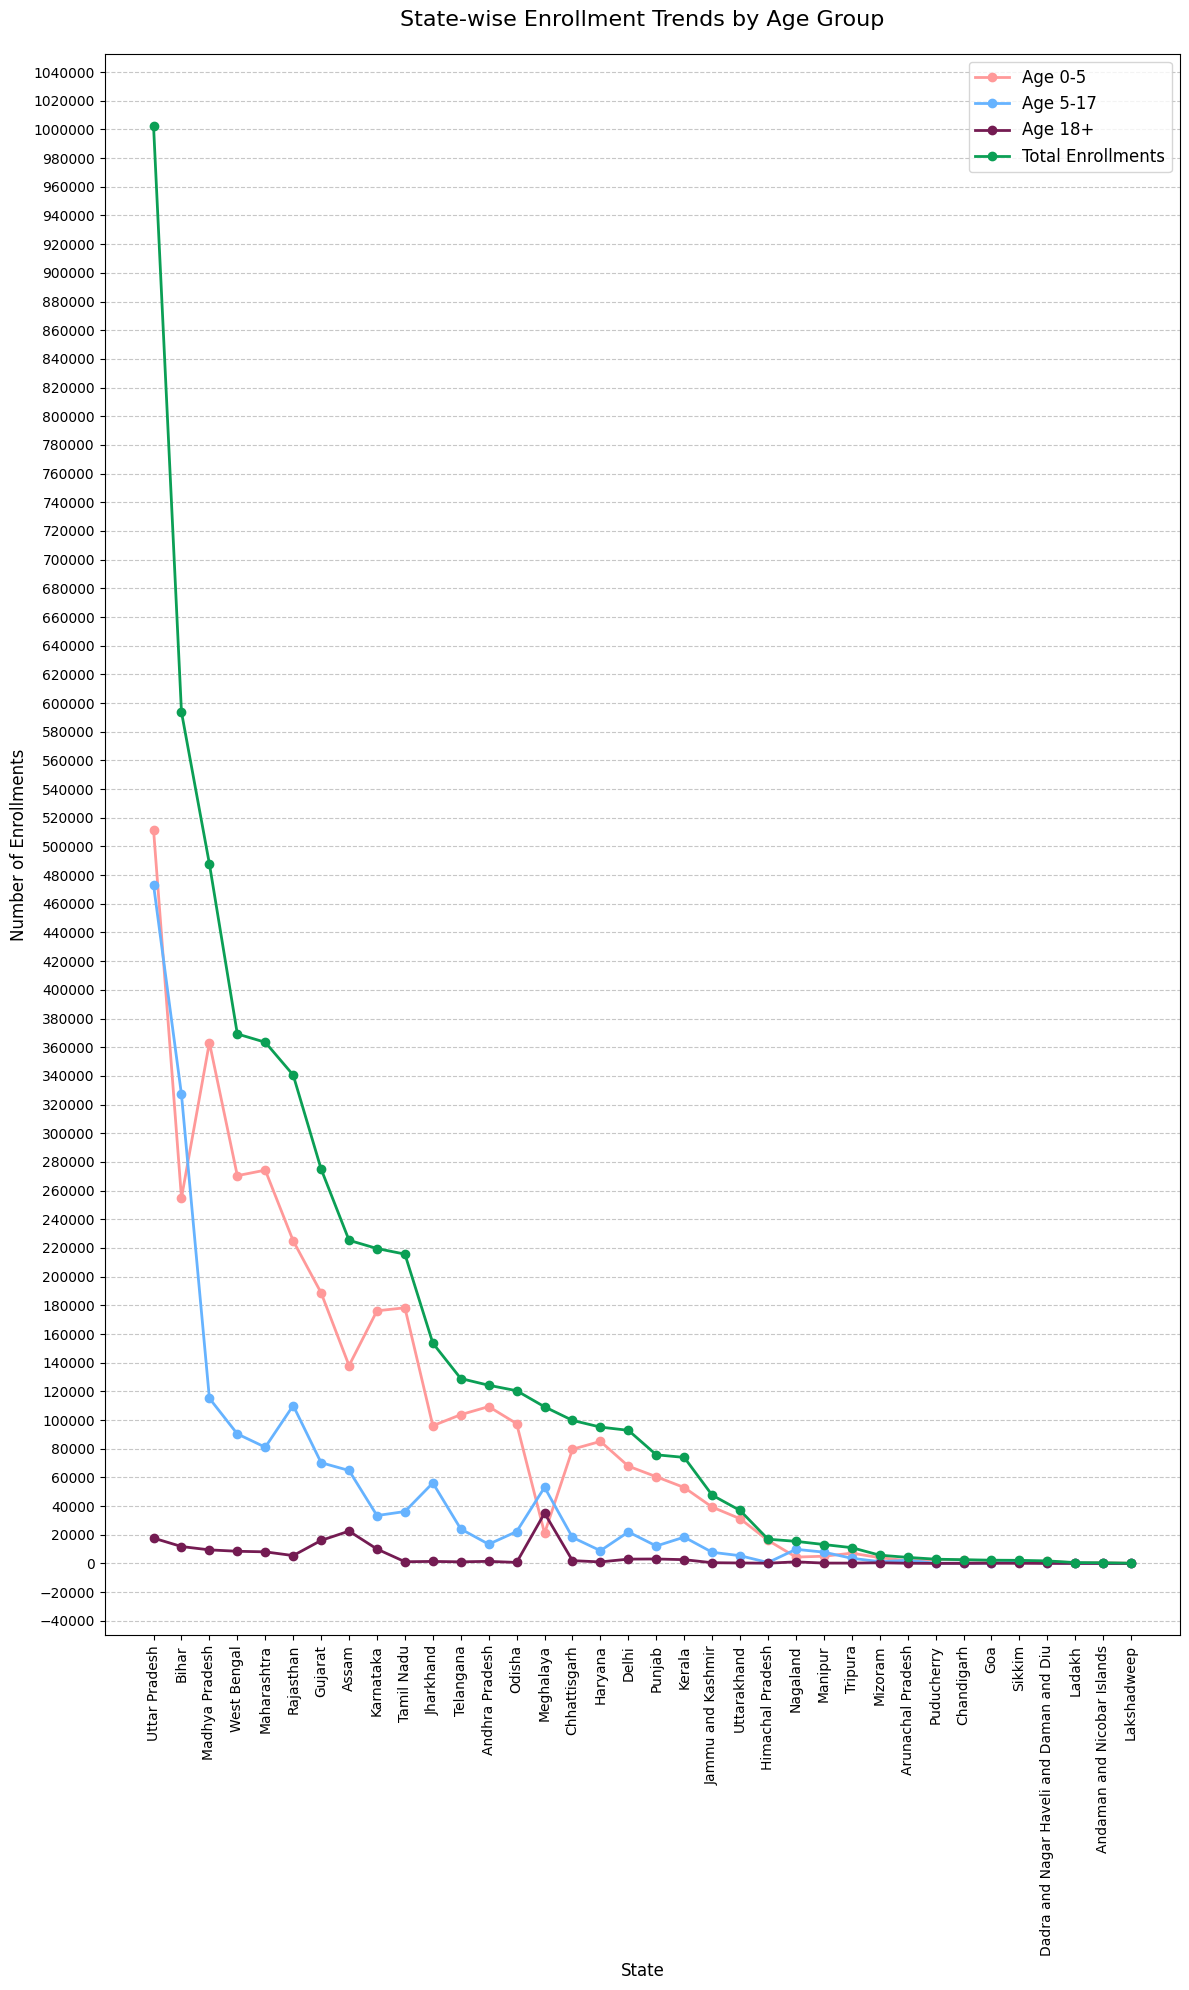

In [38]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, MultipleLocator

# 1. Prepare the data
state_names = statewise_sum.index.astype(str).tolist()

# 2. Create the Line Chart
fig, ax = plt.subplots(figsize=(12, 20))

# Plot lines for each age group
ax.plot(state_names, statewise_sum['age_0_5'], label='Age 0-5', color='#ff9999', marker='o', linewidth=2)
ax.plot(state_names, statewise_sum['age_5_17'], label='Age 5-17', color='#66b3ff', marker='o', linewidth=2)
ax.plot(state_names, statewise_sum['age_18_greater'], label='Age 18+', color="#741B52", marker='o', linewidth=2)
ax.plot(state_names, statewise_sum['total_enrollments'], label='Total Enrollments', color="#0b9f55", marker='o', linewidth=2)


# 3. SET THE Y-AXIS GAP TO 20,000
# This replaces the default 100,000 step with your requested 20,000 step
ax.yaxis.set_major_locator(MultipleLocator(20000))

# 4. Formatting for Exact Numbers (No Scientific Notation)
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.ticklabel_format(style='plain', axis='y')

# 5. Customize the Plot
ax.set_title('State-wise Enrollment Trends by Age Group', fontsize=16, pad=20)
ax.set_xlabel('State', fontsize=12)
ax.set_ylabel('Number of Enrollments', fontsize=12)

# Rotate labels to prevent overlap
plt.xticks(rotation=90, fontsize=10)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.legend(fontsize=12)

plt.tight_layout()
plt.show()

State-wise Aadhaar enrollment exhibits a consistent demographic pyramid, with over 60% of enrollments occurring in the 0–5 age group across almost all states, while adult enrollments remain below 5%. This confirms Aadhaar’s maturity and its transition from expansion (enrollment) to maintenance (updates). 

Meghalaya is a unique outlier, indicating late adoption or special demographic drives.


Special anomaly: Meghalaya
Age 0–5  = 21,072  , Age 5–17 = 53,089  , Age 18+  = 35,078  

Here:
- Age 5–17 is dominant
- Age 18+ is unusually high
- Very different from the rest of India

This suggests:
- Late Aadhaar adoption
- Catch-up enrollment drives
- Migration or documentation campaigns

Looks Like Meghalaya is still in Aadhaar expansion phase, not maintenance phase.

#### total enrollments in different district

In [39]:
districtwise_sum = df.groupby(['state_clean', 'district_clean'])[['age_0_5', 'age_5_17', 'age_18_greater', 'total_enrollments']].sum().sort_values(by='total_enrollments', ascending=False)
districtwise_sum.head(50)


,,age_0_5,age_5_17,age_18_greater,total_enrollments
state_clean,district_clean,,,,
West Bengal,North 24 Parganas,45867,13794,1651,61312
Bihar,East Champaran,21319,35813,1560,58692
Meghalaya,East Khasi Hills,6631,22730,15098,44459
Maharashtra,Thane,28692,13492,958,43142
Bihar,Sitamarhi,20358,18600,2694,41652
Uttar Pradesh,Bahraich,14491,22132,2274,38897
West Bengal,Murshidabad,30593,4290,85,34968
Maharashtra,Pune,23622,6404,1122,31148
Karnataka,Bengaluru,20227,6655,3775,30657


District-level Aadhaar enrollment is highly concentrated in a few operationally strong regions. 

While most districts show dominant early-childhood enrollment, select regions such as Meghalaya display unusually high adult enrollment, indicating late-stage adoption. 

Urban districts exhibit mixed-age patterns reflecting migration-driven demand.

Enrollment intensity ≠ population only
- Banaskantha, Barwani, Morena appear despite not being mega cities.
Meaning:
- Enrollment success depends on district administration quality, not only population.

UP is not just leading at state level; it dominates at district density level.



#### this Data created for just predictive model for 
- in this we can predict district wise monthly prediction of biometric update

In [45]:

districtwise_sum_monthly = df.groupby(['state_clean', 'district_clean',df['date'].dt.to_period('M')])[['total_enrollments']].sum()
# .sort_values(by='total_enrollments', ascending=False)
districtwise_sum_monthly

total_enrollments
state_clean                 district_clean date                      
Andaman and Nicobar Islands Andamans       2025-09                 27
                                           2025-10                 14
                                           2025-11                 12
                                           2025-12                 20
                            Nicobar        2025-09                 48
...                                                               ...
West Bengal                 Uttar Dinajpur 2025-09               8083
                                           2025-10               5989
                                           2025-11               4434
                                           2025-12               2549
                            West Medinipur 2025-10                  2

[4379 rows x 1 columns]

In [46]:
# This moves 'state_clean' from the index to a normal column
final_dff = districtwise_sum_monthly.reset_index()
final_dff.to_csv('../Data/predictive_data/districtwise_sum_monthly.csv', index=False)

#### enrollments on each pincode

In [41]:
pincode_total = (
    df.groupby('pincode')['total_enrollments']
      .sum()
      .reset_index()
      .sort_values('total_enrollments', ascending=False)
)
print(pincode_total.head(100))


       pincode  total_enrollments
2642    244001              15124
1619    202001              11687
17939   793119              11634
57      110059              10462
2811    247001               9993
...        ...                ...
4754    363641               3772
19085   843317               3769
2005    212601               3764
19147   845302               3760
6852    431122               3749

[100 rows x 2 columns]


### Trends based on dates

#### Monthly enrollments in country 

In [40]:
monthwise_sum = df.groupby( df['date'].dt.to_period('M'))[['age_0_5', 'age_5_17', 'age_18_greater', 'total_enrollments']].sum()
monthwise_sum


,age_0_5,age_5_17,age_18_greater,total_enrollments
date,,,,
2025-03,5367,7407,3808,16582
2025-04,141154,91371,24913,257438
2025-05,95342,71690,16584,183616
2025-06,98943,99911,16880,215734
2025-07,318352,263333,35183,616868
2025-09,995612,465401,14854,1475867
2025-10,536781,227414,15421,779616
2025-11,742020,286115,24438,1052573
2025-12,540818,178266,14168,733252


In [ ]:
# this data store for further multi-variate analysis with demographic and enrollment data
# This moves 'state_clean' from the index to a normal column
final_df = monthwise_sum.reset_index()
final_df.to_csv('../Data/Grouped_data/monthwise_data_enrollments.csv', index=False)

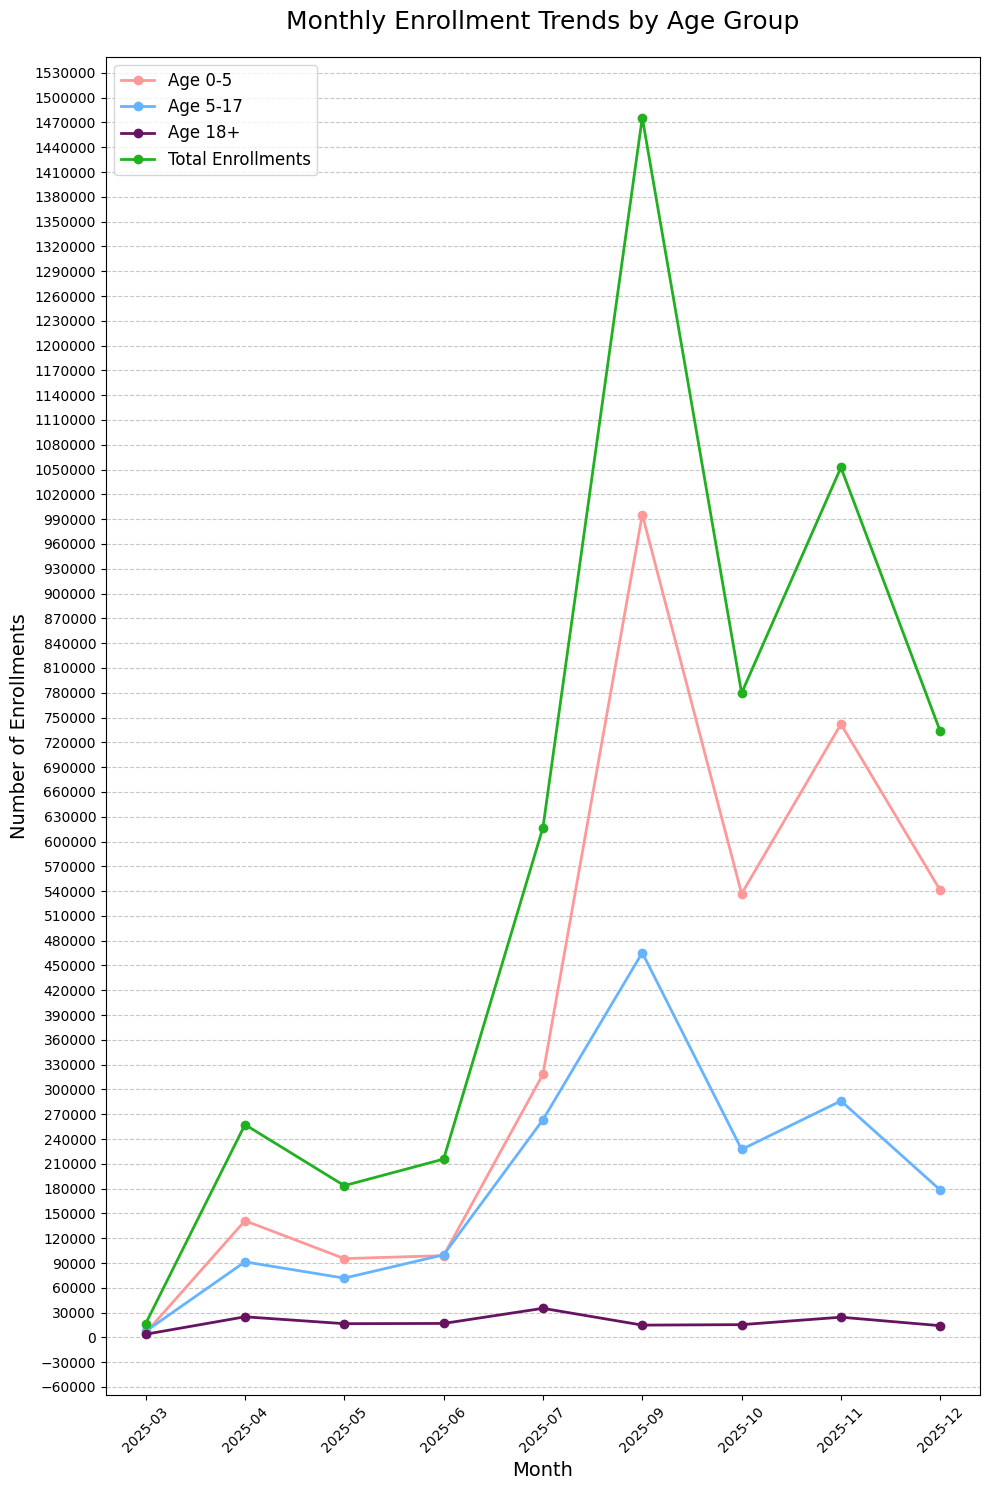

In [41]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, MultipleLocator

# 1. Prepare the data
# We assume 'monthwise_sum' is your DataFrame indexed by month
dates = monthwise_sum.index.astype(str).tolist()

# 2. Create the Line Chart
fig, ax = plt.subplots(figsize=(10, 15))

# Plot lines for each age group
ax.plot(dates, monthwise_sum['age_0_5'], label='Age 0-5', color='#ff9999', marker='o', linewidth=2)
ax.plot(dates, monthwise_sum['age_5_17'], label='Age 5-17', color='#66b3ff', marker='o', linewidth=2)
ax.plot(dates, monthwise_sum['age_18_greater'], label='Age 18+', color="#661461", marker='o', linewidth=2)
ax.plot(dates, monthwise_sum['total_enrollments'], label='Total Enrollments', color="#20b020", marker='o', linewidth=2)

# 3. Set the Y-axis interval to 30,000
ax.yaxis.set_major_locator(MultipleLocator(30000))

# 4. Format for Exact Numbers (No Scientific Notation)
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.ticklabel_format(style='plain', axis='y')

# 5. Customize the Plot appearance
ax.set_title('Monthly Enrollment Trends by Age Group', fontsize=18, pad=20)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Number of Enrollments', fontsize=14)

# Rotate date labels for better fit
plt.xticks(rotation=45, fontsize=10)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.legend(fontsize=12, loc='upper left')

plt.tight_layout()
plt.show()

Aadhaar enrollment in 2025 has transitioned into a birth-linked registration system. 

Over 98% of new enrollments come from children, with a sharp national expansion beginning September 2025, likely driven by a coordinated government enrollment campaign.

September 2025 is a structural spike (not normal growth)

Total jumps from
616K (July) → 1.47M (September) = 2.4× increase

This is not organic growth.

This indicates: A nationwide Aadhaar enrollment campaign, drive, or policy activation started in September 2025.

Aadhaar has reached saturation for adults. New enrollments are almost entirely population growth driven.


Age 5–17 follows school calendar

Notice:

July: 263k  
Sept: 465k  
Nov: 286k  

This strongly suggests:
School-based Aadhaar enrollment drives are active in academic sessions.

#### Monthly enrollments statewise 

In [43]:
# statewise monthwise sum
state_monthwise_sum = df.groupby(['state_clean', df['date'].dt.to_period('M')])[['age_0_5', 'age_5_17', 'age_18_greater', 'total_enrollments']].sum()

# uncomment below lines to see full output
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(state_monthwise_sum)
state_monthwise_sum # comment this if uncommented above

age_0_5  age_5_17  age_18_greater  \
state_clean                 date                                         
Andaman and Nicobar Islands 2025-09      172        16               0   
                            2025-10       73         8               0   
                            2025-11      105         3               0   
                            2025-12      119         5               0   
Andhra Pradesh              2025-03       43        44              29   
...                                      ...       ...             ...   
West Bengal                 2025-07    15274     11657            1613   
                            2025-09    91195     27328            1134   
                            2025-10    56795     16271             184   
                            2025-11    60799     17892             249   
                            2025-12    34706      9320            3590   

                                     total_enrollments  
state_clean                 date                        
Andaman and Nicobar Islands 2025-09                188  
                            2025-10                 81  
                            2025-11                108  
                            2025-12                124  
Andhra Pradesh              2025-03                116  
...                                                ...  
West Bengal                 2025-07              28544  
                            2025-09             119657  
                            2025-10              73250  
                            2025-11              78940  
                            2025-12              47616  

[266 rows x 4 columns]

State-wise monthly enrollment data clearly reveals a nationally synchronized Aadhaar enrollment drive beginning September 2025, overwhelmingly focused on children (0–17 years), confirming both adult saturation of Aadhaar coverage and a strategic shift toward birth-linked and school-based identity registration.

Some states show early pilot activity

States like: Assam , Meghalaya , Gujarat 
show moderate activity already in April–July.

Example Assam:
- April 2025 → 25,654  
- July 2025 → 47,873  
- Sept 2025 → 50,639

These likely acted as: Pilot or early implementation states before national scale-up.


North-East states show a different pattern

Look at Meghalaya, Nagaland, Manipur:
They have relatively higher adult share compared to large states.

Example Meghalaya 2025-04:
- Age 0–5  = 7,172  
- Age 5–17 = 16,999  
- Age 18+  = 6,341  ← high adult proportion


This suggests:
These regions still have incomplete adult Aadhaar coverage, unlike mainland India.

#### day by day enrollments

In [45]:
national_daily = (
    df.groupby('date')['total_enrollments']
      .sum()
      .reset_index()
      .sort_values('date')
)

# uncomment below lines to see full output
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(national_daily)
national_daily # comment this if uncommented above

,date,total_enrollments
0,2025-03-02,109
1,2025-03-09,3404
2,2025-03-15,3102
3,2025-03-20,6218
4,2025-03-23,576
...,...,...
87,2025-12-26,51824
88,2025-12-27,44869
89,2025-12-28,43468
90,2025-12-29,60516


The national daily Aadhaar enrollment data reveals a centrally coordinated, campaign-driven operational model. 

where enrollment activity is not continuous but executed in high-intensity phases, with September 2025 marking the full-scale nationwide rollout, characterized by stable industrial throughput (≈60k–90k enrollments/day), clear weekend/holiday slowdowns, and strong end-of-month and end-of-year surge behavior driven by administrative targets and reporting deadlines.

End-of-month processing spikes
Look:
- 2025-10-30 → 111,411  
- 2025-11-15 → 108,945  
- 2025-11-19 → 108,875  
- 2025-12-31 → 119,203  

This is classic deadline compression behavior:

Systems push higher volumes near reporting cutoffs.


October instability → campaign fatigue or reset

October is chaotic:

- 2025-10-22 → 233  
- 2025-10-23 → 1,146  
- 2025-10-24 → 36,206  

Suggests:
- Infrastructure downtime
- Reporting failures
- Administrative reset



#### Statistical Measurers

In [46]:

df[['age_0_5','age_5_17','age_18_greater','total_enrollments']].describe()

,age_0_5,age_5_17,age_18_greater,total_enrollments
count,983051.000000,983051.000000,983051.000000,983051.000000
mean,3.534292,1.720061,0.169115,5.423468
std,17.726430,14.529913,3.251934,31.932495
min,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,1.000000
50%,2.000000,0.000000,0.000000,2.000000
75%,3.000000,1.000000,0.000000,5.000000
max,2688.000000,1812.000000,855.000000,3965.000000


In [47]:
# Skewness
print("skewness:")
print(df[['age_0_5','age_5_17','age_18_greater','total_enrollments']].skew())

# Kurtosis (Fisher’s definition, normal distribution → 0)
print("\nkurtosis:")
print(df[['age_0_5','age_5_17','age_18_greater','total_enrollments']].kurtosis())

skewness:
age_0_5              43.528467
age_5_17             41.472804
age_18_greater       87.195086
total_enrollments    38.721859
dtype: float64

kurtosis:
age_0_5               3045.339230
age_5_17              2424.749375
age_18_greater       12710.691532
total_enrollments     2273.972657
dtype: float64


The extreme skewness (up to 87) and kurtosis (above 12,000) in Aadhaar enrollment data confirm that enrollment operations are not organically distributed but are driven by episodic, policy-led mass registration campaigns layered on top of a low-volume daily baseline, reflecting a centrally planned and target-oriented national identity program.

First look at the averages:
- Mean total enrollments per record ≈ 5.4
- Median = 2
- 75% of rows have ≤ 5 enrollments
- But max = 3965

This means:
Most rows represent very small enrollment events (1–5 people), while a very small number of rows represent massive enrollment drives (thousands of people).
This is a textbook “campaign + routine mix” system.

Skewness > 1 is considered as high.
Here we have 40–80, which is extreme.

This means:
99% of the data is clustered near zero, and a tiny fraction of records carry massive volume.


Normal distribution kurtosis ≈ 3
Here we have values in thousands.

This implies:
The distribution is extremely “peaked” with massive outliers.
These are not statistical noise; they are operational events (mega enrollment camps).

Especially:
age_18_greater kurtosis = 12,710

This indicates:
Adult enrollments almost never happen, but when they do, they happen in bulk drives.